In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

## K Means 

Kmeans algorithm is an unsupervised algorithm that is used to create subgroups given data sets. It finds a structure among data sets.

#### Issue with Unsupervised Learning  Algorithm
    1 - Unknown if the output is desirable
    2 - Manually check the output
    3 - Converge is depend on initial cluster centers
    
#### Why need?
    1 - Unable to label huge data sets
    2 - may need a look data set to familiar
    

In [ ]:
number_of_cluster = 3
number_of_features = 2

In [ ]:
# generate N samples
N = 300
X_1 = (np.random.random(size=(int(N/3),number_of_features))) / 3 
X_2 = (np.random.random(size=(int(N/3),number_of_features))) / 3 + [0,0.6]
X_3 = (np.random.random(size=(int(N/3),number_of_features))) / 3 + [0.6,0.0]
X = np.concatenate((X_1,X_2,X_3),axis=0)
np.random.shuffle(X)

In [ ]:
def euclidean_distance(point1,point2):
    """
    calculates the distance of given two coordinate points.
    
    Args:
        point1: int or tuple
        point2: int or tuple
    
    Returns:
        euclidian distance of given points
    """
    if np.shape(point1) != np.shape(point2):
        raise ValueError("Parameter dimension is not the same. {} != {} ".format(np.shape(point1),np.shape(point2)))
    if np.shape(point1) == 1:
        return np.sqrt((point1 - point2) ** 2)
    distance = 0
    number_of_coordinates = np.size(point1)
    for i in range(number_of_coordinates):
        distance += (point1[i] - point2[i]) ** 2
    return np.sqrt(distance)

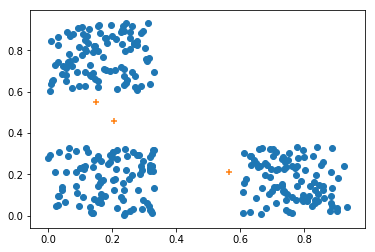

In [9]:
# print(X)
C = np.random.rand(number_of_cluster,number_of_features)
plt.scatter(X[:,0],X[:,1],marker="o")
plt.scatter(C[:,0],C[:,1],marker="+")
plt.show()

[[ 0.67493478  0.1564247 ]
 [ 0.16257544  0.20104444]
 [ 0.16465419  0.77137967]]


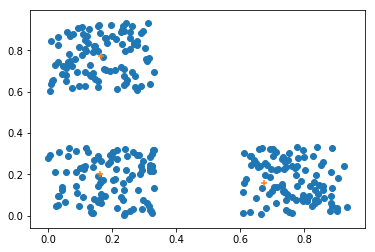

[[ 0.7595099   0.16914649]
 [ 0.19071938  0.1785063 ]
 [ 0.16465419  0.77137967]]


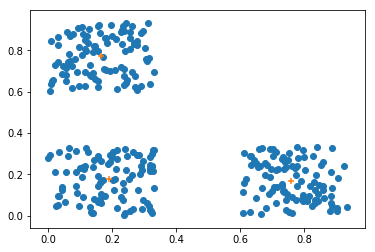

[[ 0.7595099   0.16914649]
 [ 0.19071938  0.1785063 ]
 [ 0.16465419  0.77137967]]


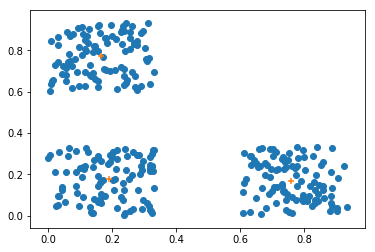

[[ 0.7595099   0.16914649]
 [ 0.19071938  0.1785063 ]
 [ 0.16465419  0.77137967]]


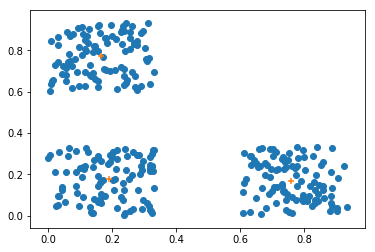

[[ 0.7595099   0.16914649]
 [ 0.19071938  0.1785063 ]
 [ 0.16465419  0.77137967]]


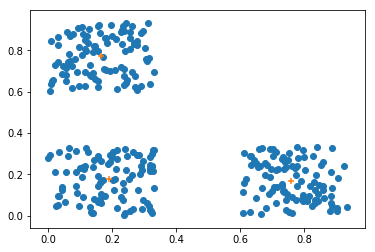

In [10]:
def recalculate_cluster_center(X, C):
    """
    calculates the center of cluster with given parameter X
    Args:
        X : list that contains features and its related cluster (feature1, feature2, cluster)
        C : is a n-dimensional array
    """
    centroids = np.copy(C)
    for i,c in enumerate(centroids):
        data_points = [arr for arr in X if arr[-1:] == i]
        # if a cluster does not have datas, 
        if len(data_points) == 0:
            continue
        cluster_data_points = np.array(data_points)[:,:-1]
        centroids[i] = 1 / len(cluster_data_points) * np.sum(cluster_data_points,axis=0)
    return centroids

        
def k_means(X,C):
    clustered_data_points = list()
    for a,x in enumerate(X):
        min_distance = np.inf
        assigned_cluster = None
        for i,c in enumerate(C): 
            distance = euclidean_distance(x,c)
            if distance < min_distance:
                min_distance = distance
                assigned_cluster = i
        clustered_data_points.append(np.append(x, assigned_cluster))
    return recalculate_cluster_center(clustered_data_points, C)

clusters = C

for i in range(5):
    clusters = k_means(X,clusters)
    print(clusters)
    plt.scatter(X[:,0],X[:,1],marker="o")
    plt.scatter(clusters[:,0],clusters[:,1],marker="+")
    plt.show()